In [1]:
%%bash
add-apt-repository ppa:ubuntu-toolchain-r/test
apt-get update --fix-missing
apt-get dist-upgrade
wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
chmod +x Miniconda3-latest-Linux-x86_64.sh
./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
conda config --set always_yes yes --set changeps1 no
conda install -q -y -c conda-forge python=3.7
conda install -q -y -c conda-forge rdkit 

 Toolchain test builds; see https://wiki.ubuntu.com/ToolChain

 More info: https://launchpad.net/~ubuntu-toolchain-r/+archive/ubuntu/test
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deads

--2021-10-14 12:36:43--  https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.201.79, 104.18.200.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.201.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh [following]
--2021-10-14 12:36:43--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.131.3, 104.16.130.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.131.3|:443... connected.
HTTP request sent, awaiting response... 416 Requested Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

                                                                                                
UnsatisfiableError: The following specificat

In [16]:
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

try:
  from rdkit import Chem
  from rdkit.Chem.Draw import IPythonConsole
  from rdkit.Chem import AllChem
  from rdkit.Chem.Draw import MolDrawing, DrawingOptions
  from rdkit.Chem import Draw
except ImportError:
  print('Stopping RUNTIME. Colaboratory will restart automatically. Please run again.')
  exit()

In [22]:
def show_atom_number(mol, label):
    for atom in mol.GetAtoms():
        atom.SetProp(label, str(atom.GetIdx()+1))
    return mol

In [93]:
DrawingOptions.bondLineWidth=1.8
DrawingOptions.atomLabelFontSize=14
#DrawingOptions.includeAtomNumbers=False

In [94]:
start_mol = Chem.MolFromSmiles('c1cc(CCCO)ccc1')

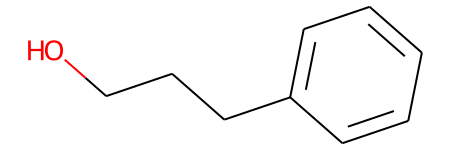

In [95]:
start_mol

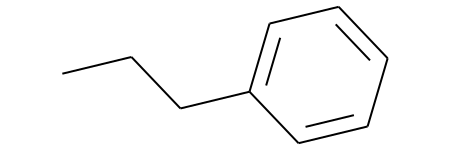

In [72]:
truncate = Chem.DeleteSubstructs(start_mol,Chem.MolFromSmiles('O'))
truncate

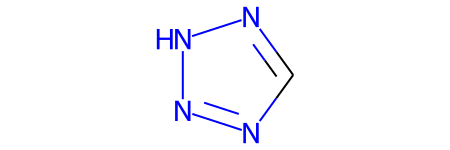

In [73]:
mod = Chem.MolFromSmiles('C1=NNN=N1')
mod

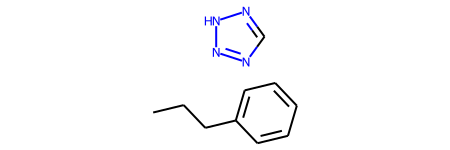

In [63]:
combo = Chem.CombineMols(truncate,mod)
combo

In [81]:
edcombo = Chem.EditableMol(combo)
DrawingOptions.includeAtomNumbers=True

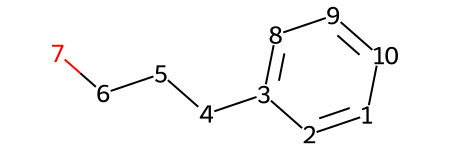

In [82]:
show_atom_number(start_mol, 'atomLabel')

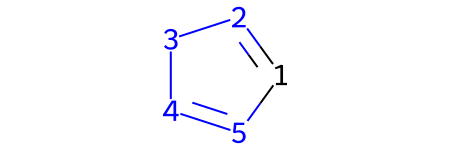

In [83]:
show_atom_number(mod, 'atomLabel')

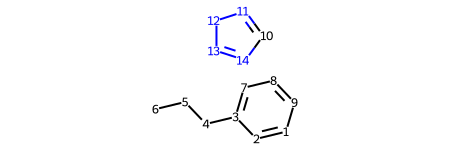

In [84]:
show_atom_number(combo, 'atomLabel')

Note that indices are zero indexed even though the are 1-indexed in the mol block above

In [85]:
edcombo.AddBond(5,9,order=Chem.rdchem.BondType.SINGLE)

15

RDKit ERROR: [13:09:27] Can't kekulize mol.  Unkekulized atoms: 10 12 13
RDKit ERROR: 


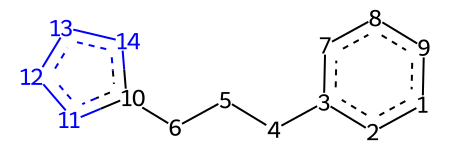

In [86]:
back = edcombo.GetMol()
back

RDKit ERROR: [13:09:44] Can't kekulize mol.  Unkekulized atoms: 10 12 13
RDKit ERROR: 


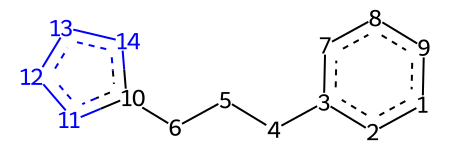

In [87]:
show_atom_number(back, 'atomLabel')

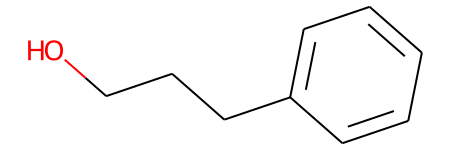

In [74]:
start_mol

In [77]:
mod_mol = Chem.ReplaceSubstructs(start_mol, 
                                 Chem.MolFromSmiles('CO'), 
                                 Chem.MolFromSmiles('C1=NNN=N1'),
                                 replaceAll=True)

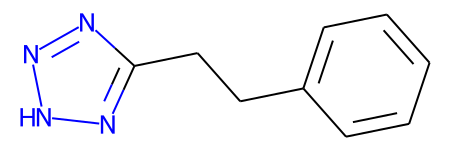

In [78]:
mod_mol[0]

In [98]:
def group_replace(mol,group,newgroup):
  new_mol = Chem.ReplaceSubstructs(mol,
                                   Chem.MolFromSmiles(group),
                                   Chem.MolFromSmiles(newgroup),
                                   replaceAll=True)
  return new_mol

In [99]:
mol_2 = group_replace(start_mol,'CO','C1=NNN=N1')

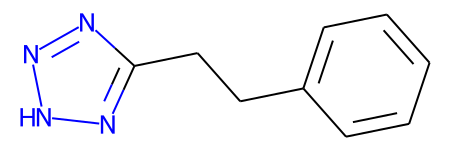

In [100]:
mol_2[0]

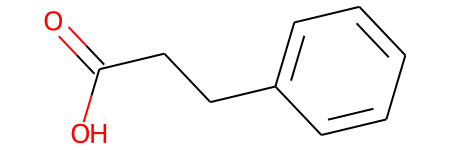

In [102]:
mol_3 = group_replace(start_mol, 'CO','C(=O)O')
mol_3[0]